# <font color='green'>  Decision Tree Regressor:</font>

**Decision Tree** is a supervised machine learning algorithm, used for both classification and regression task. Specifically we are focusing on **Regression Trees in this post.**

### Predicting Revenue of an Ice Cream Shop Based on Temperature

**1.Introduction**
- Objective: To build a Decision Tree Regressor model to predict the revenue of an ice cream shop based on temperature.


**2. Dataset Description**

- Independent Variable: Temperature

- Dependent Variable: Revenue Total revenue generated by the ice cream shop

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/USER/Desktop/M.L Data Set/IceCreamData.csv")
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
data.shape

(500, 2)

### Exploratory Data Analysis (EDA)

In [4]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
# To check whether we have Missing Value

data.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

Text(0.5, 1.0, 'Temperature v/s Revenue')

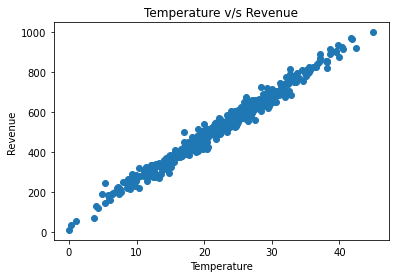

In [7]:
plt.scatter(data.Temperature,data.Revenue)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature v/s Revenue')

The scatter plot above shows a good linear relationship between the two variables.

<AxesSubplot:>

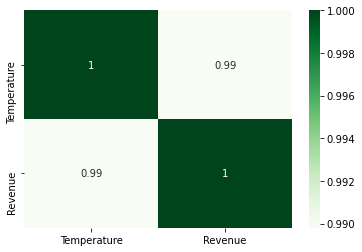

In [8]:
# check correlation  using Heatmap.

sns.heatmap(data.corr(), annot=True, cmap='Greens')

<AxesSubplot:>

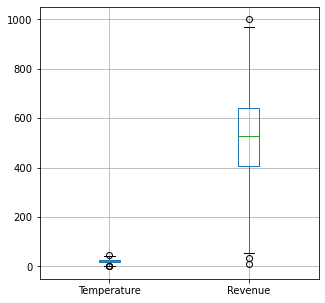

In [9]:
# Check the outliers.

plt.figure(figsize=(5,5))
data.boxplot()

### Feature Scaling:

Temperature and Revenue can be on very different scales. **Standardizing** ensures that the model treats both variables equally during analysis.

In [10]:
x=np.array(data.Temperature.values)

y= np.array(data.Revenue.values)

In [11]:
from sklearn.preprocessing import StandardScaler
stanscale = StandardScaler()

x=stanscale.fit_transform(x.reshape(-1, 1))
y=stanscale.fit_transform(y.reshape(-1, 1))

**Split data into training and test set**

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0,max_depth=3)

In [14]:
x_train.shape,x_test.shape 

((400, 1), (100, 1))

In [15]:
y_train.shape,y_test.shape 

((400, 1), (100, 1))

**Train the model**

In [16]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
#  Model Prediction
y_pred = regressor.predict(x_test)

#  Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error (MSE): 0.060564805491442816
Root Mean Squared Error (RMSE): 0.24609917816084395
R^2 Score: 0.9348876189843256


- The low **RMSE value  0.2460.**This suggests a relatively small error in the predictions, indicating good performance.



- The **R² score  0.9348.** Model explains about 93.4% of the variance in the revenue based on temperature.

Text(0, 0.5, 'actual_red/pred/green')

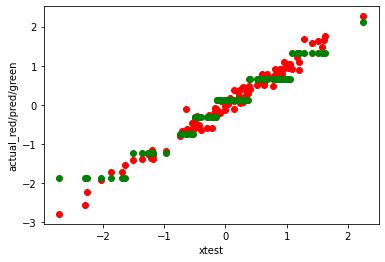

In [18]:
plt.scatter(x_test,y_test, color='red')
plt.scatter(x_test,y_pred, color='green')
plt.xlabel('xtest')
plt.ylabel('actual_red/pred/green')

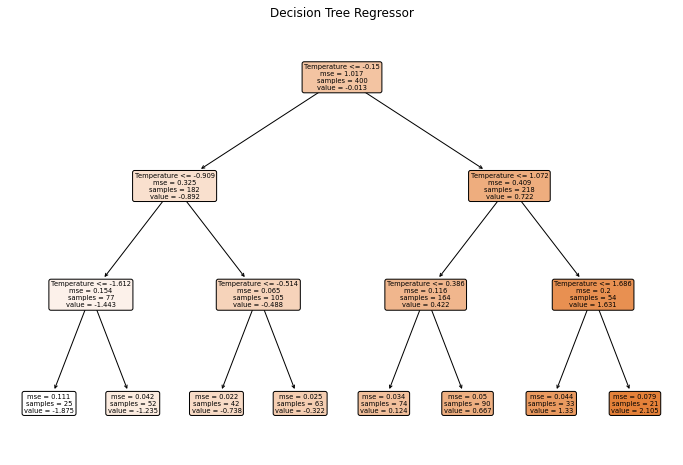

In [19]:
# 5. Model Building (continued)
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, feature_names=['Temperature'], filled=True, rounded=True)
plt.title('Decision Tree Regressor')
plt.show()